In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin, fminbound, minimize, BFGS, fmin_bfgs, differential_evolution
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ダミーデータ
Offset = [0.5]
LaneWidth = [5]
Curvature = [0.001]
ObjectX = [255]
ObjectY = [255]

In [3]:
# 各種リスク関数
def risk_line_r(x, _LaneWidth, w_r, sigma_r):
    return w_r * np.exp(np.abs(x - _LaneWidth)/sigma_r)

def risk_line_l(x, _LaneWidth, w_l, sigma_l):
    return np.fliplr([w_l * np.exp(np.abs(x - _LaneWidth)/sigma_l)])[0]

def risk_curvature(x, _LaneWidth, _Curvature, w_rho, sigma_rho):
    return w_rho * _Curvature * np.exp(np.abs(x - _LaneWidth)/sigma_rho)

def risk_obj(x, _ObjectX, _ObjectY, w_o, sigma_x, sigma_y):
    return w_o * np.exp(-(x - _ObjectX)**2/sigma_x -(_ObjectY)**2/sigma_y )
    

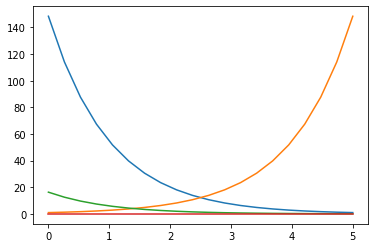

In [4]:
x = np.linspace(0, 5, 20)
plt.plot(x ,risk_line_r(x, 5, 1, 1))
plt.plot(x ,risk_line_l(x, 5, 1, 1))
plt.plot(x ,risk_curvature(x, 5, 0.11, 1, 1))
plt.plot(x ,risk_obj(x, 255, 255, 1, 1, 1))

In [5]:
# 最適化する目的関数
def evaluation_risk_potential_params(params):
    
    # ポイントを作る
    x = np.linspace(0, _LaneWidth, 20)
    risk = np.zeros(20)
    
    # リスク最小ポイントを算出
    # 白線
    risk = risk + risk_line_r(x, _LaneWidth, params[0], params[1])
    risk = risk + risk_line_l(x, _LaneWidth, params[2], params[3])
    
    # 曲率
    risk = risk + risk_curvature(x, _LaneWidth, _Curvature, params[4], params[5])
    
    # 物体
    risk = risk + risk_obj(x, _ObjectX, _ObjectY, params[6], params[7], params[8])
    
    # オフセットを計算
    offset = x[np.argmin(risk)]
    
    return np.abs((_LaneWidth/2 + _Offset) - offset)


In [13]:
# 最適化する目的関数
def evaluation_risk_potential_params_debug(params):
    
    # ポイントを作る
    x = np.linspace(0, _LaneWidth, 20)
    risk = np.zeros(20)
    
    # リスク最小ポイントを算出
    # 白線
    risk = risk + risk_line_r(x, _LaneWidth, params[0], params[1])
    risk = risk + risk_line_l(x, _LaneWidth, params[2], params[3])
    
    # 曲率
    risk = risk + risk_curvature(x, _LaneWidth, _Curvature, params[4], params[5])
    
    # 物体
    risk = risk + risk_obj(x, _ObjectX, _ObjectY, params[6], params[7], params[8])
    
    # オフセットを計算
    offset = x[np.argmin(risk)]
    
    # debug
    plt.plot(x, risk)
    print(x)
    print(np.argmin(risk))
    print(offset)
    print(np.abs((_LaneWidth/2 + _Offset) - offset))


In [7]:
# 重みの最小値
w_r_min = 0
w_l_min = 0
w_obj_min = 0
w_rho_min = 0
# 重みの最大値
w_r_max = 1
w_l_max = 1
w_obj_max = 1
w_rho_max = 1

# 正規分布の標準偏差の最小値
sigma_r_min = 0.001
sigma_l_min = 0.001
sigma_obj_x_min = 0.001
sigma_obj_y_min = 0.001
sigma_rho_min = 0.001
# 正規分布の標準偏差の最大値
sigma_r_max = 100
sigma_l_max = 100
sigma_obj_x_max = 100
sigma_obj_y_max = 100
sigma_rho_max = 100

# 制約
bounds = [
    [w_r_min, w_r_max], [sigma_r_min, sigma_r_max],
    [w_l_min, w_l_max], [sigma_l_min, sigma_l_max],
    [w_rho_min, w_rho_max], [sigma_rho_min, sigma_rho_max],
    [w_obj_min, w_obj_max], [sigma_obj_x_min, sigma_obj_x_max], [sigma_obj_y_min, sigma_obj_y_max]
]

In [8]:
_Offset = Offset[0]
_LaneWidth = LaneWidth[0]
_Curvature = Curvature[0]
_ObjectX = ObjectX[0]
_ObjectY = ObjectY[0]

In [9]:
# 最適化
res = differential_evolution(evaluation_risk_potential_params, bounds)

In [10]:
res

     fun: 0.10526315789473717
 message: 'Optimization terminated successfully.'
    nfev: 15535
     nit: 114
 success: True
       x: array([ 0.82452328, 88.8267346 ,  0.85771782, 93.26597871,  0.60794725,
       89.05896086,  0.14147069, 85.77355449, 10.97160932])

In [11]:
params = res.x

[0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ]
11
2.894736842105263
0.10526315789473717


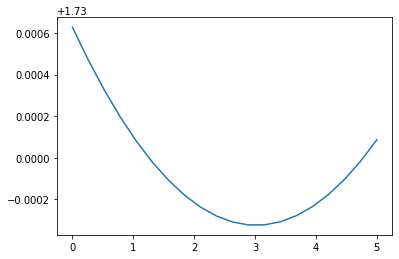

In [14]:
evaluation_risk_potential_params_debug(params)